#This is a problem statement called lendingclub case study
#You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

#In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the #tendency of default.

In [130]:
import pandas as pd, numpy as np
#reaing loan data into a data frame and viewing sample rows
loan_dataset =  pd.read_csv("loan.csv")
loan_dataset.head()

<ipython-input-130-b845d6bdec6f>:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_dataset =  pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [131]:
loan_dataset.shape

(39717, 111)

# Exploratory Data analysis and cleaning/ conversion of data that is not in correct data type  use info to find the column datatypes and check if they are in correct form

In [132]:
#Data Analysis . Looking at the sample data we can see that there are many columns which have NA or 0 for all rows from which we cannot infer any information about
#the loan defaulters or not . so we can drop those columns using iloc which is the index pf the dataframe
# find columns with only NAN values
(loan_dataset.isnull().sum())


,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
tax_liens,39
tot_hi_cred_lim,39717
total_bal_ex_mort,39717
total_bc_limit,39717


In [133]:
loan_dataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [134]:
#drop the columns that has only Nan values  how=all
#this says that we have only  33 columns which has data. the rest out of 87 columns had only NAN .
#this simplifies the columns to be analysed
loan_dataset_cleaned = loan_dataset.dropna(axis =1, how='all')

#also drop columns like member id , address, zipcode , desc, url,
loan_dataset_cleaned = loan_dataset_cleaned.drop(columns=['member_id', 'desc', 'url', 'title', 'emp_title', 'zip_code', 'addr_state', 'earliest_cr_line'])

#also srop columns that have same value and dont add value like mths_since_last_major_derog, policy_code, application_type,
loan_dataset_cleaned = loan_dataset_cleaned.drop(columns=[ 'policy_code', 'application_type'])

loan_dataset_cleaned.shape

(39717, 47)

In [135]:
(loan_dataset_cleaned.isnull().sum())


,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1075


In [136]:
#the columns have maximum nulls, so imputing mayn not yield results . dropping them
#mths_since_last_delinq	25682
#mths_since_last_record	36931
#next_pymnt_d
#loan_dataset_cleaned = loan_dataset_cleaned.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'])
nunique = loan_dataset_cleaned.nunique()
cols_to_drop = nunique[nunique == 1].index
loan_dataset_cleaned.drop(cols_to_drop, axis=1)
loan_dataset_cleaned.shape

(39717, 47)

In [137]:
#the column emp length has some missing values, convert to categorical values .  strip years . <1 year has value zero and 10+years has value 10
loan_dataset_cleaned['emp_length'] = loan_dataset_cleaned['emp_length'].str.strip(' years').str.strip('< +').astype(float)
loan_dataset_cleaned['emp_length'].value_counts()


,count
emp_length,
10.0,8879
1.0,7823
2.0,4388
3.0,4095
4.0,3436
5.0,3282
6.0,2229
7.0,1773
8.0,1479


In [138]:
#delete rows where emp_length is NA
loan_dataset_cleaned['emp_length'] = loan_dataset_cleaned['emp_length'].dropna()
loan_dataset_cleaned['emp_length'].value_counts()


,count
emp_length,
10.0,8879
1.0,7823
2.0,4388
3.0,4095
4.0,3436
5.0,3282
6.0,2229
7.0,1773
8.0,1479


In [139]:
(loan_dataset_cleaned.isnull().sum())


,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1075


In [140]:
#just extracting the loan defaulters
loan_defaulters = loan_dataset_cleaned.loc[loan_dataset_cleaned['loan_status']=='Charged Off']
loan_defaulters.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5627 non-null   int64  
 1   loan_amnt                   5627 non-null   int64  
 2   funded_amnt                 5627 non-null   int64  
 3   funded_amnt_inv             5627 non-null   float64
 4   term                        5627 non-null   object 
 5   int_rate                    5627 non-null   object 
 6   installment                 5627 non-null   float64
 7   grade                       5627 non-null   object 
 8   sub_grade                   5627 non-null   object 
 9   emp_length                  5399 non-null   float64
 10  home_ownership              5627 non-null   object 
 11  annual_inc                  5627 non-null   float64
 12  verification_status         5627 non-null   object 
 13  issue_d                     5627 non-

In [141]:
#convert term to integer value
loan_dataset_cleaned['term'] = loan_dataset_cleaned['term'].apply(str)
loan_dataset_cleaned['term'] = loan_dataset_cleaned['term'].str.strip(' months').astype(int)
loan_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  int64  
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  float64
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [142]:
#convert interest rate  to integer value
loan_dataset_cleaned['int_rate'] = loan_dataset_cleaned['int_rate'].apply(str)
loan_dataset_cleaned['int_rate'] = loan_dataset_cleaned['int_rate'].str.strip('%').astype(float)
loan_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  int64  
 5   int_rate                    39717 non-null  float64
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  float64
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [143]:
#check if any Nan values needs to be imputed
loan_dataset_cleaned.isnull().sum()


,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1075


In [144]:
#revol_util has null values. so impute missing values by converting to float after stripping percentage and impute by median
loan_dataset_cleaned['revol_util'] = loan_dataset_cleaned['revol_util'].apply(str)
loan_dataset_cleaned['revol_util'] = loan_dataset_cleaned['revol_util'].str.strip('%').astype(float)
loan_dataset_cleaned['revol_util'] = loan_dataset_cleaned['revol_util'].fillna(loan_dataset_cleaned['revol_util'].median())
loan_dataset_cleaned.revol_util.value_counts()


,count
revol_util,
0.00,977
49.30,93
0.20,63
63.00,62
0.10,58
...,...
25.74,1
47.36,1
24.65,1


In [177]:
loan_dataset_cleaned.shape

(37778, 31)

In [176]:
loan_dataset_cleaned = loan_dataset_cleaned.loc[:, loan_dataset_cleaned.isin([' ','NULL',0, np.nan]).mean() < .6]

In [145]:
#visualise data with the verification status of the loan
import matplotlib.pyplot as plt
import seaborn as sns


# Outliers analysis and removing outliers



<Axes: xlabel='annual_inc'>

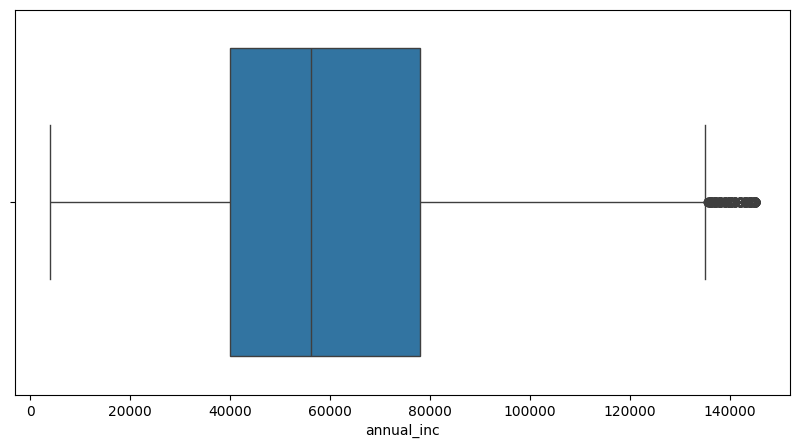

In [178]:
#box plot annual income to find outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=loan_dataset_cleaned.annual_inc)


<Axes: >

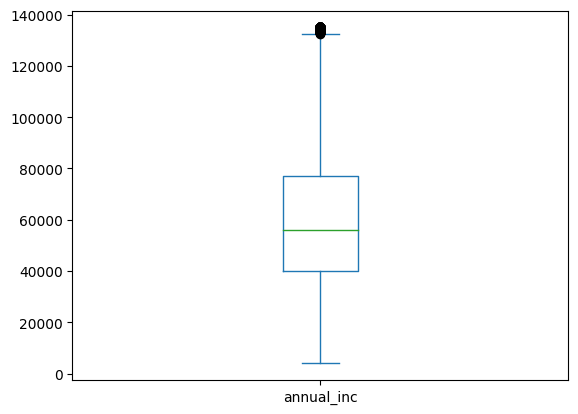

In [179]:
Q3 = np.percentile(loan_dataset_cleaned.annual_inc,75)
Q1 = np.percentile(loan_dataset_cleaned.annual_inc,25)
IQR =  np.percentile(loan_dataset_cleaned.annual_inc,75) - np.percentile(loan_dataset_cleaned.annual_inc,25)
loan_dataset_cleaned = loan_dataset_cleaned[loan_dataset_cleaned.annual_inc >= Q1-1.5*IQR]
loan_dataset_cleaned = loan_dataset_cleaned[loan_dataset_cleaned.annual_inc <= Q3 + 1.5*IQR]
loan_dataset_cleaned.annual_inc.plot.box()

In [148]:
#Remove rows with home_ownership as none or other
loan_dataset_cleaned = loan_dataset_cleaned[loan_dataset_cleaned.home_ownership != 'NONE']
loan_dataset_cleaned = loan_dataset_cleaned[loan_dataset_cleaned.home_ownership != 'OTHER']

<Axes: xlabel='int_rate'>

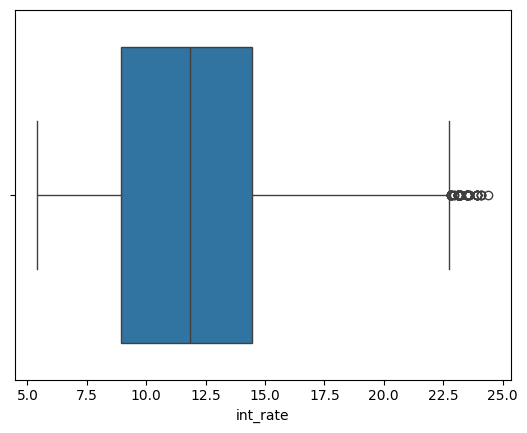

In [149]:
sns.boxplot(x=loan_dataset_cleaned.int_rate)


# Visualising data to check correlation and percentage distribution

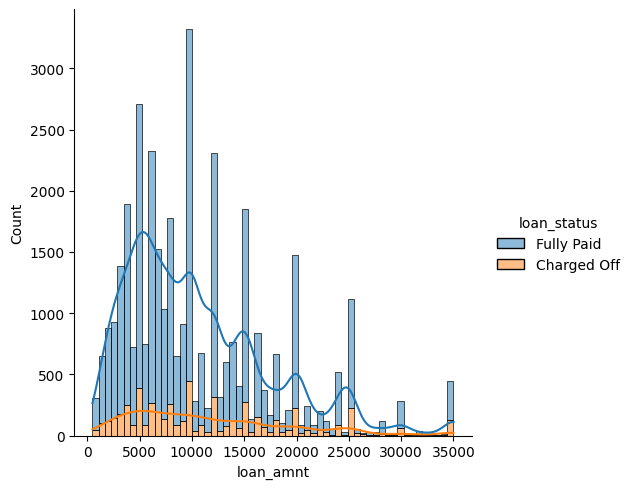

In [150]:
#find correlation between  plot of term and loan amount
loan_dataset_notcurrent = loan_dataset_cleaned.loc[loan_dataset_cleaned['loan_status']!='Current']
sns.displot(data=loan_dataset_notcurrent, x="loan_amnt", hue="loan_status", multiple="stack", kde=True)
# does this tell us that people who take loan between 5000 and 10000 are more pront to default


In [151]:
loan_dataset_cleaned.annual_inc.value_counts()

,count
annual_inc,
60000.00,1500
50000.00,1056
40000.00,873
45000.00,829
30000.00,825
...,...
45912.00,1
48444.00,1
32020.00,1


In [152]:
sortedannualinc = loan_dataset_cleaned.sort_values('annual_inc',ascending=False)
sortedannualinc['annual_inc'].head(10)

,annual_inc
36128,145008.0
11851,145008.0
13184,145000.0
12006,145000.0
10610,145000.0
12889,145000.0
33182,145000.0
6611,145000.0
35833,145000.0
21452,145000.0


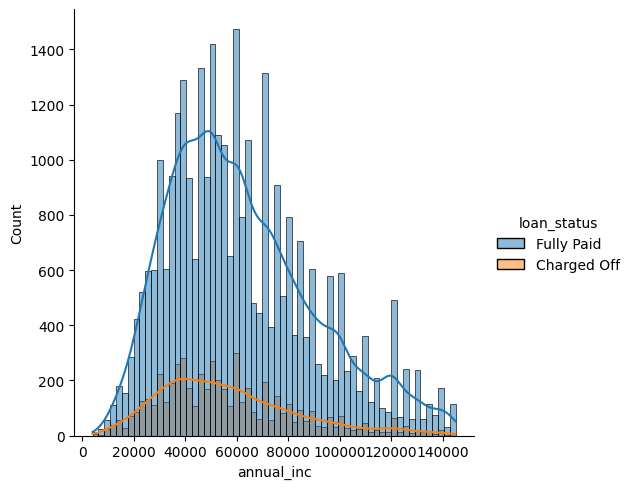

In [153]:
#find correlation between  annual income and loan_status
sns.displot(data=loan_dataset_notcurrent, x='annual_inc',hue='loan_status', kde=True)
# does this tell us that people who  have annual come less than 80000 are more   prone to be defaulters ??

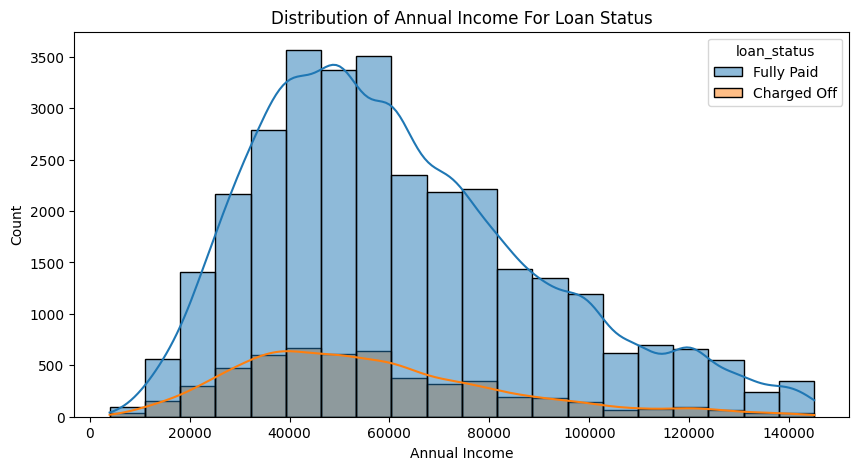

In [154]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan_dataset_notcurrent,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

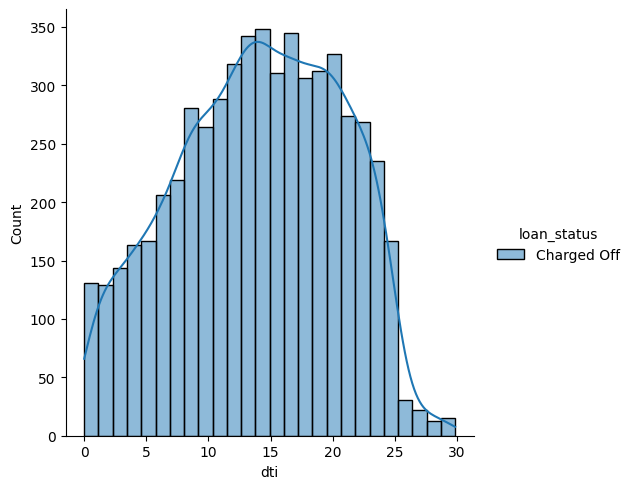

In [155]:
sns.displot(data=loan_defaulters, x='dti',hue='loan_status', kde=True)
# Inference : customers with dti between 10 and 20 are more likely to default


<Axes: xlabel='grade', ylabel='percent'>

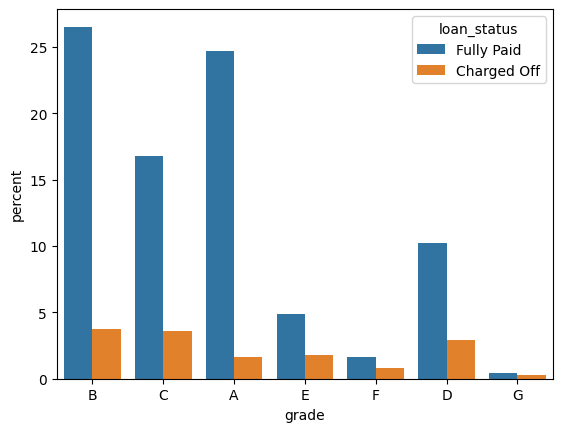

In [156]:
sns.countplot(data=loan_dataset_notcurrent, x="grade" ,hue="loan_status", stat="percent")
#
#this tells us that grade A and B have been given highest number of loans


In [157]:
#propotion of loan_status in each grade
propotion_grade = loan_dataset_notcurrent.groupby(['grade', 'loan_status']).size()/ loan_dataset_notcurrent.groupby(['grade']).size() * 100
propotion_grade
#distribution of the percentage of charged off loans across grades.
#Inference :  A and B grades have lower percent of defaulters


grade  loan_status
A      Charged Off     6.116746
       Fully Paid     93.883254
B      Charged Off    12.366220
       Fully Paid     87.633780
C      Charged Off    17.676903
       Fully Paid     82.323097
D      Charged Off    22.268126
       Fully Paid     77.731874
E      Charged Off    26.894866
       Fully Paid     73.105134
F      Charged Off    32.657658
       Fully Paid     67.342342
G      Charged Off    35.955056
       Fully Paid     64.044944
dtype: float64

<Axes: >

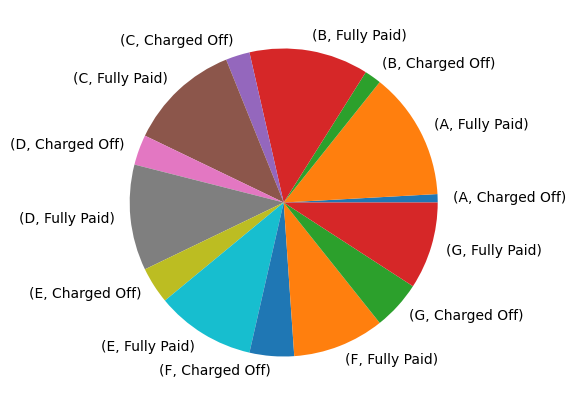

In [158]:
propotion_grade.plot.pie(figsize=(5,5))


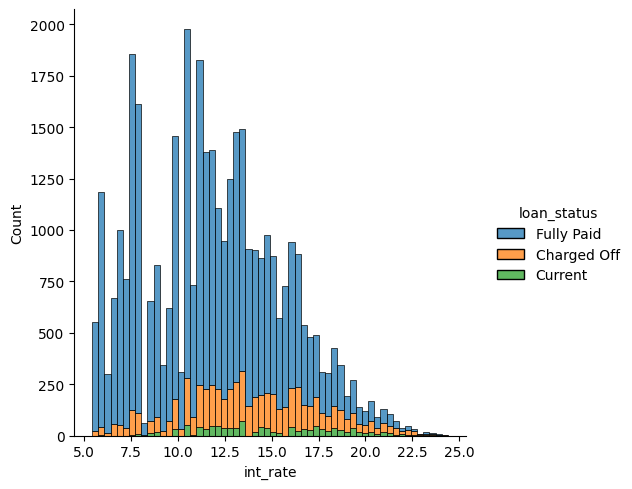

In [159]:
sns.displot(data=loan_dataset_cleaned, x="int_rate" , hue='loan_status', multiple='stack')
#this tell us that interest rate has no correlation with the defaulters

In [160]:
#sns.displot(data=loan_dataset_cleaned, x="home_ownership" , hue='loan_status',  multiple='stack')
propotion = loan_dataset_cleaned.groupby(['home_ownership', 'loan_status']).size()/ loan_dataset_notcurrent.groupby(['home_ownership']).size() * 100
propotion
#people with own house have less default rate

home_ownership  loan_status
MORTGAGE        Charged Off    13.953783
                Current         3.621399
                Fully Paid     86.046217
OWN             Charged Off    15.234102
                Current         2.795248
                Fully Paid     84.765898
RENT            Charged Off    15.356510
                Current         2.242028
                Fully Paid     84.643490
dtype: float64

<Axes: xlabel='revol_bal', ylabel='Count'>

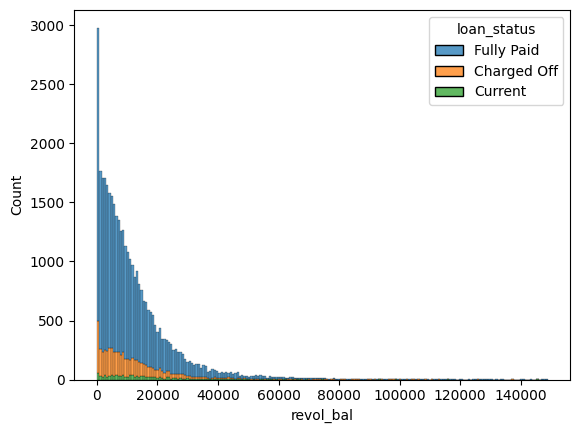

In [161]:
sns.histplot(data=loan_dataset_cleaned, x="revol_bal" , hue='loan_status',  multiple='stack')
#this says that the revol_bal has not much correlation with the default status


In [162]:
loan_dataset_cleaned.corr(numeric_only=True)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.136641,0.146960,0.244421,0.212218,0.074399,0.081630,0.115166,0.037224,0.097705,...,-0.058425,0.036027,-0.011041,0.120681,NaN,NaN,NaN,NaN,-0.008871,NaN
loan_amnt,0.136641,1.000000,0.981925,0.939675,0.364137,0.298839,0.929723,0.155922,0.404951,0.093748,...,0.040994,0.137656,0.071570,0.444015,NaN,NaN,NaN,NaN,-0.032706,NaN
funded_amnt,0.146960,0.981925,1.000000,0.957615,0.344416,0.303589,0.955321,0.155643,0.400739,0.093113,...,0.042960,0.139860,0.073921,0.448935,NaN,NaN,NaN,NaN,-0.034047,NaN
funded_amnt_inv,0.244421,0.939675,0.957615,1.000000,0.364594,0.297869,0.903108,0.166338,0.384384,0.100646,...,0.023544,0.127156,0.059557,0.439459,NaN,NaN,NaN,NaN,-0.038690,NaN
term,0.212218,0.364137,0.344416,0.364594,1.000000,0.447500,0.103548,0.115897,0.083695,0.085946,...,0.012979,0.102765,0.032868,0.232685,NaN,NaN,NaN,NaN,0.012922,NaN
int_rate,0.074399,0.298839,0.303589,0.297869,0.447500,1.000000,0.274215,0.003206,0.059558,0.113206,...,0.090770,0.120853,0.064904,0.149141,NaN,NaN,NaN,NaN,0.085692,NaN
installment,0.081630,0.929723,0.955321,0.903108,0.103548,0.274215,1.000000,0.124834,0.400980,0.080914,...,0.051263,0.120471,0.073803,0.396437,NaN,NaN,NaN,NaN,-0.029421,NaN
emp_length,0.115166,0.155922,0.155643,0.166338,0.115897,0.003206,0.124834,1.000000,0.192953,0.058670,...,-0.016432,0.023819,0.003150,0.077206,NaN,NaN,NaN,NaN,0.064590,NaN
annual_inc,0.037224,0.404951,0.400739,0.384384,0.083695,0.059558,0.400980,0.192953,1.000000,-0.075184,...,0.003836,0.039153,0.019978,0.214104,NaN,NaN,NaN,NaN,-0.009033,NaN
dti,0.097705,0.093748,0.093113,0.100646,0.085946,0.113206,0.080914,0.058670,-0.075184,1.000000,...,-0.011656,0.026031,0.010607,0.019951,NaN,NaN,NaN,NaN,0.003974,NaN


In [163]:
def print_highly_correlated(df, features, threshold=0.5):
	#prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df[features].corr(numeric_only=True) # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

    if s_corr_list == []:
      print("There are no highly correlated features with correlation above", threshold)
    else:
      for v, i, j in s_corr_list:
        cols = df[features].columns
        print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [164]:
print_highly_correlated(loan_dataset_cleaned, loan_dataset_cleaned.columns, 0.5)

out_prncp and out_prncp_inv = 1.000
loan_amnt and funded_amnt = 0.982
total_pymnt and total_rec_prncp = 0.971
total_pymnt and total_pymnt_inv = 0.970
funded_amnt and funded_amnt_inv = 0.958
funded_amnt and installment = 0.955
loan_amnt and funded_amnt_inv = 0.940
total_pymnt_inv and total_rec_prncp = 0.939
loan_amnt and installment = 0.930
funded_amnt_inv and total_pymnt_inv = 0.909
funded_amnt_inv and installment = 0.903
funded_amnt and total_pymnt = 0.899
loan_amnt and total_pymnt = 0.882
funded_amnt_inv and total_pymnt = 0.876
funded_amnt and total_pymnt_inv = 0.866
funded_amnt and total_rec_prncp = 0.864
installment and total_pymnt = 0.853
loan_amnt and total_pymnt_inv = 0.849
pub_rec and pub_rec_bankruptcies = 0.849
loan_amnt and total_rec_prncp = 0.846
installment and total_rec_prncp = 0.845
funded_amnt_inv and total_rec_prncp = 0.839
total_pymnt and total_rec_int = 0.827
mths_since_last_record and pub_rec_bankruptcies = 0.826
total_pymnt_inv and total_rec_int = 0.813
installment

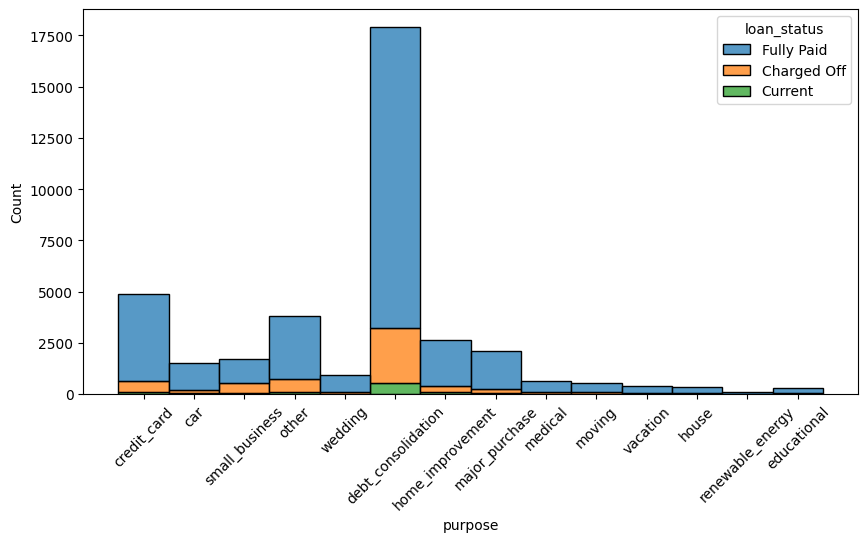

In [165]:
plt.figure(figsize=(10,5))
ax  =  sns.histplot(data=loan_dataset_cleaned, x="purpose" , hue='loan_status',  multiple='stack')
ax.tick_params(axis='x', labelrotation=45)
plt.show()
#debt consolidation seems to be the maximum purpose for taking loan and has more defaulters

<Axes: xlabel='revol_util', ylabel='Count'>

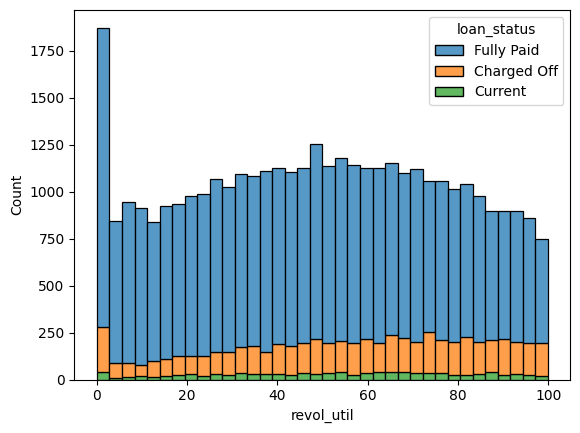

In [166]:
sns.histplot(data=loan_dataset_cleaned, x="revol_util" , hue='loan_status',  multiple='stack')
#seems Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit
#

<Axes: xlabel='emp_length', ylabel='Count'>

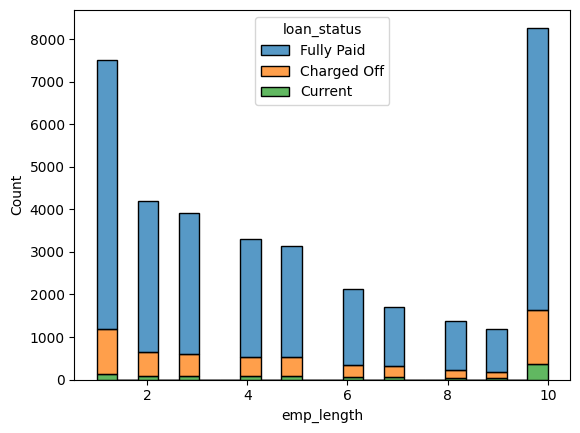

In [167]:
sns.histplot(data=loan_dataset_cleaned, x="emp_length" , hue='loan_status',  multiple='stack')
#Inference . Customers with 10 or more years of experince take loan more loans

In [168]:
propotion = loan_dataset_cleaned.groupby(['emp_length', 'loan_status']).size()/ loan_dataset_cleaned.groupby(['emp_length']).size() * 100
propotion
#inference . customers at all employment length have an average of 14% defaulters

emp_length  loan_status
1.0         Charged Off    14.137242
            Current         1.812125
            Fully Paid     84.050633
2.0         Charged Off    13.000000
            Current         2.190476
            Fully Paid     84.809524
3.0         Charged Off    13.660783
            Current         1.944231
            Fully Paid     84.394986
4.0         Charged Off    13.470874
            Current         2.730583
            Fully Paid     83.798544
5.0         Charged Off    14.053018
            Current         2.587033
            Fully Paid     83.359949
6.0         Charged Off    13.917526
            Current         2.671040
            Fully Paid     83.411434
7.0         Charged Off    14.747356
            Current         3.407756
            Fully Paid     81.844888
8.0         Charged Off    14.017341
            Current         2.890173
            Fully Paid     83.092486
9.0         Charged Off    12.626263
            Current         2.609428
            Fully Paid     84.764310
10.0        Charged Off    15.377176
            Current         4.291586
            Fully Paid     80.331238
dtype: float64

In [169]:
min, max  = loan_dataset_cleaned.annual_inc.min(), loan_dataset_cleaned.annual_inc.max()
min, max

(4000.0, 145008.0)

<Axes: xlabel='revol_bal', ylabel='Count'>

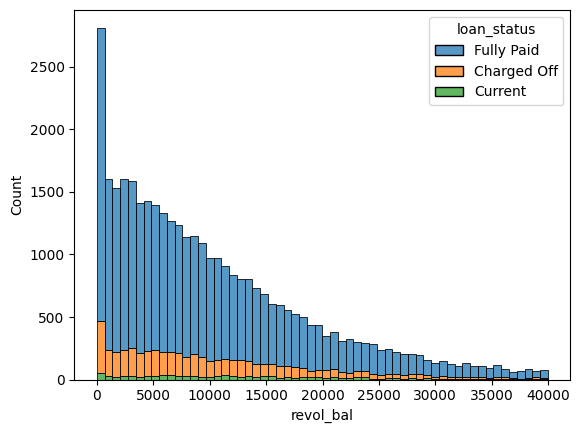

In [170]:
sns.histplot(data=loan_dataset_cleaned[loan_dataset_cleaned['revol_bal'] < 40000], x="revol_bal" , hue='loan_status',  multiple='stack')
#Inference .total credit revolving balance less than 20000 has more defaulters

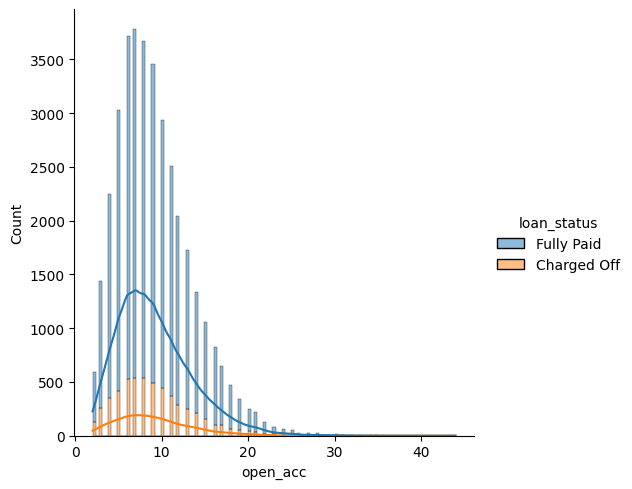

In [180]:
sns.displot(data=loan_dataset_notcurrent, x="open_acc" , hue='loan_status',  multiple='stack', kde=True)
# customers with open accounts between 5 and 10 have more defaulters

In [172]:
#find propotion of open accounts to loan status as charged off
open_acc_20 = loan_dataset_cleaned[loan_dataset_cleaned.open_acc > 20]
propotion = open_acc_20.groupby(['open_acc', 'loan_status']).size()/ open_acc_20.groupby(['open_acc']).size() * 100
propotion

open_acc  loan_status
21        Charged Off     15.418502
          Current          3.964758
          Fully Paid      80.616740
22        Charged Off     12.781955
          Current          3.007519
          Fully Paid      84.210526
23        Charged Off     14.117647
          Current          4.705882
          Fully Paid      81.176471
24        Charged Off     11.428571
          Current          8.571429
          Fully Paid      80.000000
25        Charged Off     20.754717
          Current          1.886792
          Fully Paid      77.358491
26        Charged Off     22.222222
          Fully Paid      77.777778
27        Charged Off     23.809524
          Fully Paid      76.190476
28        Charged Off     23.809524
          Fully Paid      76.190476
29        Fully Paid     100.000000
30        Charged Off     16.666667
          Fully Paid      83.333333
31        Charged Off     50.000000
          Fully Paid      50.000000
32        Current         25.000000
          Fully Paid      75.000000
33        Charged Off     66.666667
          Fully Paid      33.333333
34        Charged Off     20.000000
          Fully Paid      80.000000
35        Fully Paid     100.000000
36        Fully Paid     100.000000
38        Charged Off    100.000000
39        Fully Paid     100.000000
41        Fully Paid     100.000000
42        Fully Paid     100.000000
44        Fully Paid     100.000000
dtype: float64

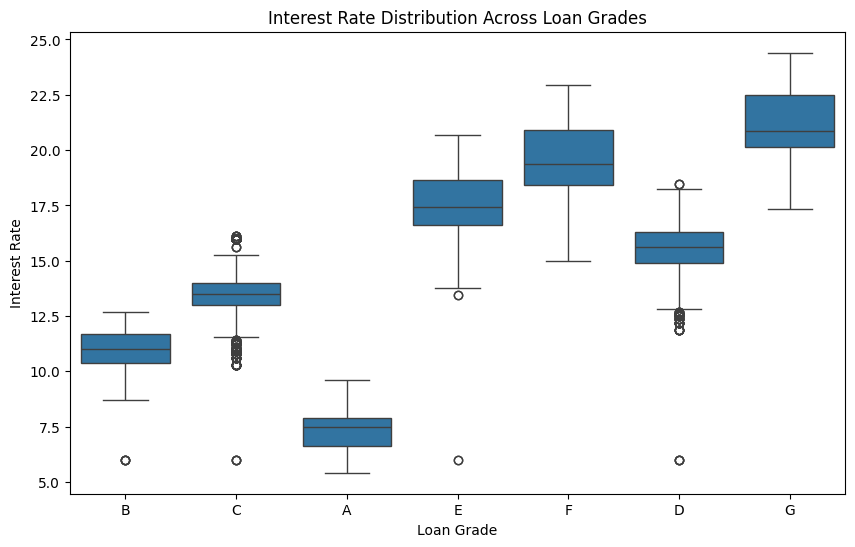

In [173]:
# prompt: bi variate analysis using grade and int_rate

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_dataset_notcurrent)
plt.title('Interest Rate Distribution Across Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x782dc29b4f70> (for post_execute):


KeyboardInterrupt: 

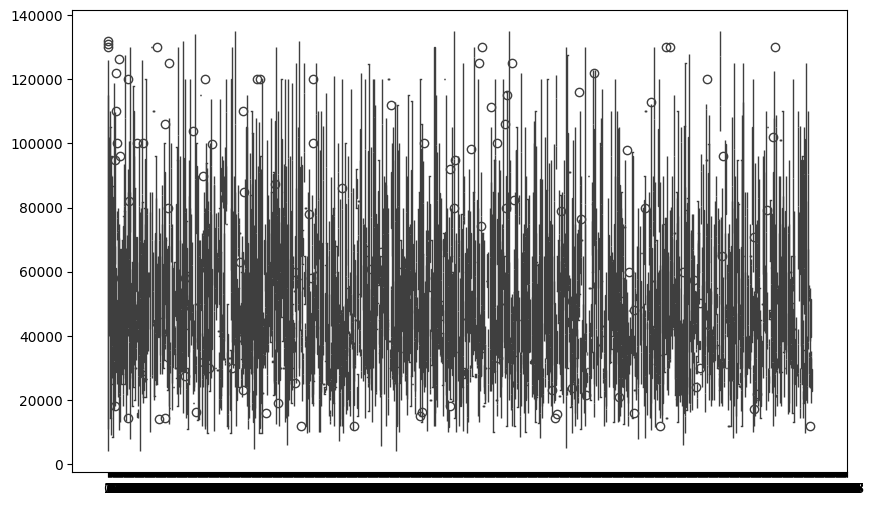

In [183]:
# prompt: bi variate analysis using dti and annual income

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revol_bal', y='annual_inc', data=loan_dataset_cleaned)
plt.title('annual income Across Loan Grades')
plt.xlabel('revol_bal')
plt.ylabel('annual income')
plt.show()